<a href="https://colab.research.google.com/github/abhishek-parashar/ica-eeg/blob/master/Copy_of_ICA_abhishek_parashar_msit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*this is a ica notebook *

In [0]:
pip install mne

importing libraries and loading dataset


In [0]:
import mne 

In [0]:
from mne.datasets import sample

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as ply

In [0]:
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [0]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'


generating filters because ica works on high frequency so using high pass filter 

In [0]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.filter(1., None, n_jobs=1, fir_design='firwin')


Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 497 samples (3.310 sec)



<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 376 x 41700 (277.7 sec), ~123.3 MB, data loaded>

creating parameters

In [0]:
method = 'fastica'
n_components = 25
decim = 3
random_state = 23

In [0]:
ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (fastica):  samples, no dimension reduction>


In [0]:
reject = dict(mag=5e-12, grad=4000e-13)
ica.fit(raw, picks='meg', decim=decim, reject=reject)
print(ica)

Fitting ICA to data using 305 channels (please be patient, this may take a while)
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [4242, 4343]
    Rejecting  epoch based on MAG : ['MEG 1711']
Artifact detected in [5858, 5959]
Selection by number: 25 components
Fitting ICA took 1.9s.
<ICA  |  raw data decomposition, fit (fastica): 13635 samples, 25 components, channels used: "mag"; "grad">


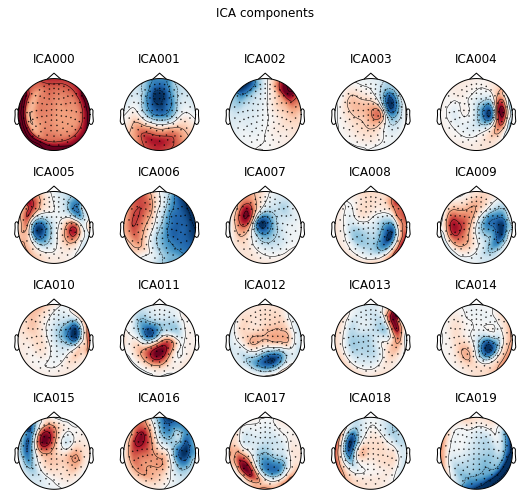

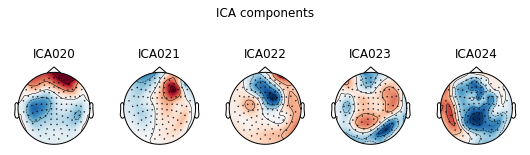

[<Figure size 540x504 with 20 Axes>, <Figure size 540x180 with 5 Axes>]

In [0]:
ica.plot_components()

*removing eog that is blinking of eye artefacts and thus reducing dimension 
## creating the epochs that is time elapsed for the blinking or eog sample and using average of the same to set the ica parameters since ica works on high frequency setting the required frequency by using band pass and high pass filter system and thus setting the frequency about 2 hz thus btaiinig the scores by getting covariance and thus plotting the required result.*

In [0]:
eog_average = create_eog_epochs(raw, reject=dict(mag=5e-12, grad=4000e-13),
                                picks='meg').average()


EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 2.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 1.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition 

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 2.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 1.75 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 45.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition 

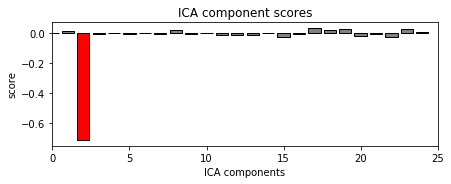

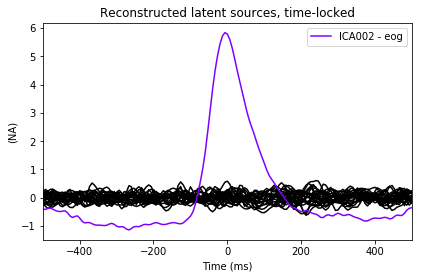

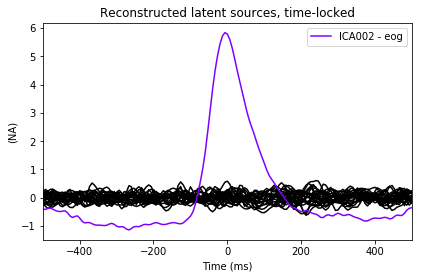

In [0]:
eog_epochs = create_eog_epochs(raw, reject=reject)
eog_inds, scores = ica.find_bads_eog(eog_epochs)
ica.plot_scores(scores, exclude=eog_inds)
ica.plot_sources(eog_average, exclude=eog_inds)
                